In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import random
import pandas as pd

from PIL import Image

In [7]:
# Import images

def import_images(path):
    s = []
    for filename in glob.glob(path):
        img = Image.open(filename,'r')
        img = img.resize((256,256))
        img = np.array(img)
        IMG = img.ravel()
        s.append(IMG)
    return s

#Normal images
path1 = 'Term_Project/BMEN415_DataSets_Group1/COVID-19_Radiography_Dataset/Normal/masks/*.png'
n = import_images(path1)
print("n = ", len(n))
train_n = []
for i in n:
    train_n.append(i)

#Covid images
path2 = 'Term_Project/BMEN415_DataSets_Group1/COVID-19_Radiography_Dataset/COVID/masks/*.png'
c = import_images(path2)
print("c  = ", len(c))
train_y = []
for i in c:
    train_y.append(i)
    
df_train_n = pd.DataFrame({'image':train_n, 'label': 'normal'}) 
df_train_y = pd.DataFrame({'image':train_y, 'label': 'covid'})

train_data = df_train_n.append(df_train_y,ignore_index=True)

n =  10192
c  =  3616


/var/folders/8k/7w5pq5x94r9chdh11ry6d8p40000gn/T/ipykernel_2942/1132574344.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_data = df_train_n.append(df_train_y,ignore_index=True)


In [8]:
#Find outliers
a = 1
outlier = []
for i in range(len(train_data)):
    if(len(train_data.image[i])!=(3*256**2)):
        a = a + 1
        outlier.append(i)

print(len(outlier)) #no outliers

train_data=train_data.drop(outlier,axis=0)

0


In [9]:
x_train = []

for tdim in train_data.image:
    x_train.append(tdim)
    
y_train = np.array(train_data.label)
y_traind = []

for i in range(len(y_train)):
    if(y_train[i]=="normal"):
        y_traind.append(0)
    else:
        y_traind.append(1)

x_traind = np.array(x_train)

number_of_classes = 2

y_train = np.zeros([len(y_traind), number_of_classes])
for i in range(len(y_traind)):
        y_train[i][y_traind[i]] = 1

In [10]:
#Test, train, and split the data
from sklearn.model_selection import train_test_split

#test 30% of our data, train 70%
x_train, x_test, y_train, y_test = train_test_split(x_traind, y_train, test_size=0.3)

# convert to Matrix 
x_train = np.matrix(x_train)
x_test = np.matrix(x_test)
y_train = np.matrix(y_train)
y_test = np.matrix(y_test)

In [11]:
#build ELM model
input_ = x_train.shape[1]

Win = np.random.normal(size=[input_, 750])
Win = np.matrix(Win)

In [12]:

def hiddeninput(x):
    print("shape of x:",x.shape)
    print("weights shape:",Win.shape)
    a = np.dot(x, Win)
    a = np.maximum(a, 1, a) #rel = 1
    return a

X = hiddeninput(x_train)
Xt = np.transpose(X)

shape of x: (9665, 196608)
weights shape: (196608, 750)


In [13]:
www1 = np.dot(Xt, X)
b = np.identity(len(np.array(www1)))
b = np.dot(b,3)

www1 += b
ww1 = np.linalg.inv(www1)
ww2 = np.dot(Xt, y_train)

Wout = np.dot(ww1, ww2)


In [16]:
# Prediction

def prediction(x):
    x = hiddeninput(x)
    y = np.dot(x, Wout)
    return y 

y = prediction(x_test)
corr = 0


for i in range(y.shape[0]):
    test = np.argmax(y_test[i])
    pred = np.argmax(y[i])

    corr = corr + (1 if pred == test else 0)
    
accuracy = corr/y.shape[0]
print('the accuracy is:',accuracy)



shape of x: (4143, 196608)
weights shape: (196608, 750)
the accuracy is: 0.7924209510016896


<AxesSubplot:>

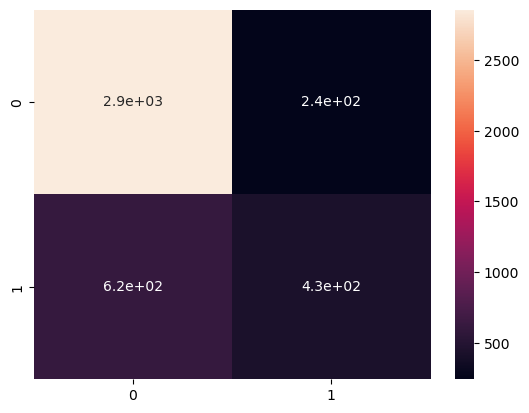

In [17]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = y_test.argmax(axis=1) 
y_pred_array = np.asarray(y)
y_true_array = np.asarray(y_true)


cm = confusion_matrix(y_true_array, y_pred_array.argmax(axis=1))
sns.heatmap(cm, annot=True)
